<a href="https://colab.research.google.com/github/ayushipradhan30/DMDW-Lab-Assignment/blob/main/DMDW_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sbs
get_ipython().run_line_magic('matplotlib','inline')
plt.style.use('seaborn-whitegrid')

In [ ]:
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url,sep=',')
dfn=df[['traveltime','studytime']]
dfn.head()

,traveltime,studytime
0,2,2
1,1,2
2,1,2
3,1,3
4,1,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


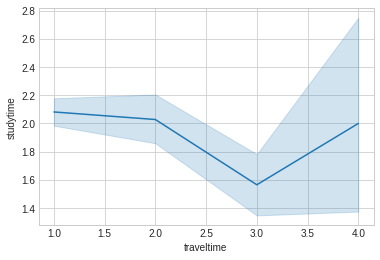

In [ ]:
x=dfn['traveltime']
y=dfn['studytime']
sbs.lineplot(x,y,dashes=True)
#plt.show()

            traveltime  studytime
traveltime    1.000000  -0.100909
studytime    -0.100909   1.000000


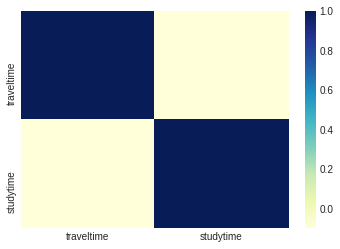

In [ ]:
from scipy.stats import norm
corelation=dfn.corr()
print(corelation)
sbs.heatmap(corelation,cmap="YlGnBu")

            traveltime  studytime
traveltime    0.486513  -0.059070
studytime    -0.059070   0.704324


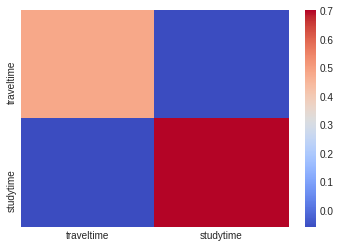

In [ ]:
covar=dfn.cov()
print(covar)
sbs.heatmap(covar,cmap='coolwarm')
#plt.show()

In [ ]:
dfnom=df[['Mjob','Fjob']]
dfnom.head()
dfnom=dfnom.replace('at_home','home')
dfnom=dfnom.astype('category')
dfnom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Mjob    395 non-null    category
 1   Fjob    395 non-null    category
dtypes: category(2)
memory usage: 1.3 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dfnom['Mjob']=lb.fit_transform(dfnom['Mjob'])
dfnom['Fjob']=lb.fit_transform(dfnom['Fjob'])
dfnom=np.array(dfnom)
dfnom=dfnom[dfnom!=0]

In [ ]:
from scipy.stats import chi2_contingency
stat,p,dof,expected=chi2_contingency(dfnom)
print(stat)
print(p)
print(dof)
print(expected.shape)

0.0
1.0
0
(738,)


In [ ]:
#Normalisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/Anasuya-Sahoo/DMDW-Lab/main/student-mat.csv"
df=pd.read_csv(url,sep=',')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


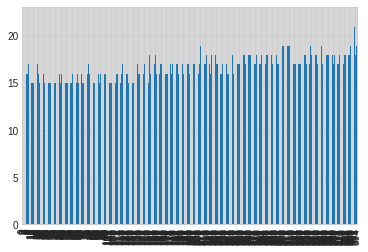

In [ ]:
df['age'].plot(kind='bar')

In [ ]:
age=np.array(df['age'])
print('MAX AGE',max(age))
print('MIN AGE',min(age))
age=age.reshape(395,1)

MAX AGE 22
MIN AGE 15


In [ ]:
#Z-score normalization
from scipy import stats
zscore=np.array(stats.zscore(age))
zscore=zscore[0:394]
zscore=zscore.reshape(2,197)

In [ ]:
#Decimal normalisation
result=[]
result.append(age/pow(10,2))
result=np.array(result)